In [1]:
import os
import imageio
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = os.chdir('C:/Users/Admin/Desktop/PERSONAL PROJECTS/DATA/seefood/train/hot_dog')

In [4]:
hotdog_train = os.listdir(path)
len(hotdog_train)

289

In [5]:
#Converting the hot dog images into pixel values
hot_dog_train =[]
for i in hotdog_train:
    #extracting pixel values from the image
    arr = np.array(imageio.imread(i))
    #Selecting just the square images and appending it to the list
    if arr.shape == (512,512,3):   
        hot_dog_train.append(arr)

In [6]:
print('No. of square images: ',len(hot_dog_train))

No. of square images:  190


In [7]:
#converting the rgb list to a 4D array
hot_dog_train = np.array(hot_dog_train)
print('Shape: ', hot_dog_train.shape)
print('Dimension(s):',hot_dog_train.ndim)

Shape:  (190, 512, 512, 3)
Dimension(s): 4


In [8]:
path_2 = os.chdir('C:/Users/Admin/Desktop/PERSONAL PROJECTS/DATA/seefood/train/not_hot_dog')

In [9]:
not_hotdog = os.listdir(path_2)
len(not_hotdog)

255

In [10]:
#Converting the hot dog images into pixel values
not_hotdog_pixels =[]
for i in not_hotdog:
    #extracting pixel values from the image
    arr = np.array(imageio.imread(i))
    #Selecting just the square images and appending it to the list
    if arr.shape == (512,512,3):   
        not_hotdog_pixels.append(arr)

In [11]:
print('No. of square images: ',len(not_hotdog_pixels))

No. of square images:  26


In [12]:
hot_dog_train = np.array(hot_dog_train)
not_hotdog_pixels = np.array(not_hotdog_pixels)
new = np.concatenate((hot_dog_train, not_hotdog_pixels))

In [13]:
new.shape

(216, 512, 512, 3)

In [14]:
yes = np.ones([1, 190],int)
yes.shape

(1, 190)

In [15]:
no = np.zeros([1,26], int)
no.shape

(1, 26)

In [16]:
no_yes = np.append(yes,no)
no_yes = no_yes.reshape(-1, no_yes.shape[0])


In [44]:
no_yes.shape

(1, 216)

In [45]:
X_train = new
y_train = no_yes

In [19]:
X_train = np.squeeze(np.asarray(X_train))
y_train = np.squeeze(np.asarray(y_train))

In [46]:
y_train.shape

(1, 216)

In [20]:
path_3 = os.chdir('C:/Users/Admin/Desktop/PERSONAL PROJECTS/DATA/seefood/test/hot_dog')

In [21]:
hotdog_test = os.listdir(path_3)
len(hotdog_test)

209

In [22]:
#Converting the hot dog images into pixel values
hotdog_test_pic =[]
for i in hotdog_test:
    #extracting pixel values from the image
    arr = np.array(imageio.imread(i))
    #Selecting just the square images and appending it to the list
    if arr.shape == (512,512,3):   
        hotdog_test_pic.append(arr)

In [23]:
print('No. of square images: ',len(hotdog_test_pic))

No. of square images:  50


In [24]:
path_4 = os.chdir('C:/Users/Admin/Desktop/PERSONAL PROJECTS/DATA/seefood/test/not_hot_dog')

In [25]:
not_hotdog_test = os.listdir(path_4)
len(not_hotdog_test)

244

In [26]:
not_hotdog_test_pic =[]
for i in not_hotdog_test:
    #extracting pixel values from the image
    arr = np.array(imageio.imread(i))
    #Selecting just the square images and appending it to the list
    if arr.shape == (512,512,3):   
        not_hotdog_test_pic.append(arr)
        
print('No. of square images: ', len(not_hotdog_test_pic))

No. of square images:  3


In [27]:
hotdog_test_pic = np.array(hotdog_test_pic)
not_hotdog_test_pic = np.array(not_hotdog_test_pic)
print('hotdog_test_pic shape: ', hotdog_test_pic.shape)
print('not_hotdog_test_pic shape: ', not_hotdog_test_pic.shape)

hotdog_test_pic shape:  (50, 512, 512, 3)
not_hotdog_test_pic shape:  (3, 512, 512, 3)


In [28]:
yes_test = np.ones([1,50], int)
no_test = np.zeros([1,3],int)

In [29]:
yes_no_test = np.append(yes_test, no_test)
yes_no_test = yes_no_test.reshape(-1, yes_no_test.shape[0])

In [30]:
yes_no_test.shape

(1, 53)

In [31]:
X_test = np.concatenate((hotdog_test_pic, not_hotdog_test_pic))
y_test = yes_no_test

In [37]:
X_test = np.squeeze(np.asarray(X_test))
y_test = np.squeeze(np.asarray(y_test))

In [42]:
X_test.shape

(53, 512, 512, 3)

In [50]:
#Assigning labels Not Hotdog (y=0) and Hotdog (y=1)
classes = np.array([ b'Not Hotdog', b'Hotdog'])

In [51]:
import matplotlib.pyplot as plt

y = [1], it's a 'Hotdog' picture.


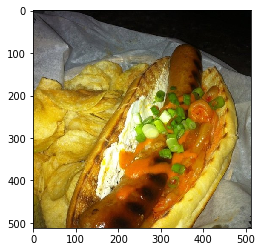

In [52]:
# Example of a picture
index = 20
plt.imshow(X_train[index])
print("y = " + str(y_train[:, index]) + ", it's a '" + classes[np.squeeze(y_train[:, index])].decode("utf-8") +  "' picture.")

In [53]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
print('X_train_flatten shape: ', X_train_flatten.shape)
print('X_test_flatten shape: ', X_test_flatten.shape)

X_train_flatten shape:  (786432, 216)
X_test_flatten shape:  (786432, 53)


In [54]:
#standardizing the data
#divide every row of the dataset by 255 (the maximum value of a pixel channel)
X_train = X_train_flatten/255
X_test = X_test_flatten/255

In [77]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

In [84]:
def initialize_zero(dim):


    w = np.zeros([dim, 1])
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [79]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)                                    # compute activation
    cost = (-1 / m) * np.sum((Y * np.log(A)) + (1-Y)* np.log(1- A))   # cost function J

    
    #Backward Propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
        
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [80]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [81]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0,i] < 0.5:
            Y_prediction[0,i] = 0
        elif A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [85]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_zero(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [86]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 0.005, print_cost = True)

train accuracy: 100.0 %
test accuracy: 84.90566037735849 %
